# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

In [23]:
cities_found = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind_speeds = []
country = []
date = []

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['sys']['sunrise'])
        cities_found.append(city)
        print(f"Processing Record for {city}")
    except:
        print(f"{city} was not found. Skipping ")

Processing Record for rikitea
Processing Record for avarua
Processing Record for cherskiy
Processing Record for hilo
Processing Record for rundu
Processing Record for longyearbyen
Processing Record for busselton
Processing Record for henties bay
Processing Record for sao filipe
Processing Record for alpuyeca
Processing Record for puerto ayora
Processing Record for tuktoyaktuk
Processing Record for grindavik
Processing Record for nanhai
Processing Record for atuona
Processing Record for pindi gheb
Processing Record for kontagora
Processing Record for ushuaia
Processing Record for yellowknife
Processing Record for bredasdorp
Processing Record for luderitz
Processing Record for port hedland
Processing Record for saldanha
Processing Record for naze
Processing Record for lulea
Processing Record for huanuco
Processing Record for punta arenas
Processing Record for albany
Processing Record for kapaa
Processing Record for jamestown
Processing Record for yinchuan
Processing Record for mehamn
Pro

Processing Record for vao
Processing Record for saint-pierre
Processing Record for corinto
Processing Record for laguna
Processing Record for tiarei
Processing Record for isangel
marcona was not found. Skipping 
sataua was not found. Skipping 
Processing Record for ostrovnoy
Processing Record for kimbe
Processing Record for gat
Processing Record for talcahuano
Processing Record for adrar
Processing Record for palmerston north
Processing Record for bahia honda
Processing Record for hamilton
Processing Record for calvinia
Processing Record for kailua
Processing Record for dondo
Processing Record for jalu
Processing Record for maple creek
Processing Record for san quintin
Processing Record for salinopolis
Processing Record for papetoai
safwah was not found. Skipping 
Processing Record for los llanos de aridane
Processing Record for bonthe
Processing Record for amboasary
Processing Record for tynda
Processing Record for meulaboh
Processing Record for fortuna
Processing Record for baiyin
Pr

Processing Record for tatui
Processing Record for mankachar
vaitupu was not found. Skipping 
Processing Record for komsomolskiy
Processing Record for bonavista
Processing Record for pilar
galgani was not found. Skipping 
Processing Record for qui nhon
Processing Record for kavieng
Processing Record for dauphin
Processing Record for belaya gora
aflu was not found. Skipping 
Processing Record for salalah
Processing Record for mazamet
Processing Record for hasaki
Processing Record for oussouye
Processing Record for rivadavia
Processing Record for aswan
Processing Record for sao mateus
Processing Record for quetigny
Processing Record for alta gracia
Processing Record for kangaatsiaq
Processing Record for batman
Processing Record for dalbandin
Processing Record for mbinga
Processing Record for kenai
Processing Record for xining
Processing Record for alice
bargal was not found. Skipping 
Processing Record for vilhena
Processing Record for nome
Processing Record for riyadh
Processing Record f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
city_weather = pd.DataFrame({
    'City': cities_found,
    'Latitude': lat,
    'Longitude': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': wind_speeds,
    'Country': country,
    "Date": date
})
city_weather

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,72.34,76,22,8.59,PF,1658504306
1,avarua,-21.2078,-159.7750,78.85,73,20,12.66,CK,1658510063
2,cherskiy,68.7500,161.3000,51.89,49,18,2.73,RU,1658498247
3,hilo,19.7297,-155.0900,77.88,81,100,10.36,US,1658505151
4,rundu,-17.9333,19.7667,54.66,61,1,6.55,NA,1658553042
...,...,...,...,...,...,...,...,...,...
535,bay roberts,47.5999,-53.2648,69.04,90,4,7.36,CA,1658476692
536,yavatmal,20.4000,78.1333,72.21,94,100,9.08,IN,1658535517
537,fort nelson,58.8053,-122.7002,75.70,32,38,6.06,CA,1658489910
538,dakar,14.6937,-17.4441,76.08,83,100,11.45,SN,1658559025


In [28]:
city_weather.to_csv("..\output_data\weatherdata.csv")

In [30]:
city_weather.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,19.575212,18.745421,68.584981,72.590741,55.559259,7.343074,1.603236e+09
std,33.436224,89.777530,13.500989,19.965302,41.782126,4.958553,2.979895e+08
min,-54.800000,-175.200000,19.350000,9.000000,0.000000,0.000000,0.000000e+00
25%,-7.496975,-56.203675,57.887500,63.750000,6.750000,3.490000,1.658491e+09
50%,23.201800,22.002350,69.980000,77.000000,70.000000,6.275000,1.658524e+09
75%,47.795875,96.396375,78.712500,87.000000,100.000000,10.210000,1.658543e+09
max,78.218600,179.316700,111.600000,100.000000,100.000000,28.660000,1.658600e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
city_weather[city_weather["Humidity"] > 100]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

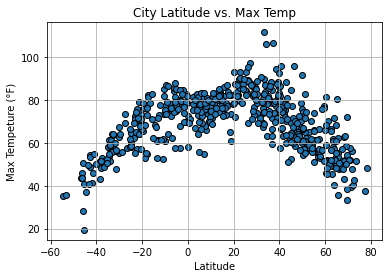

In [124]:
plt.scatter(city_weather['Latitude'], city_weather['Max Temp'], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Tempeture (°F)")
plt.title("City Latitude vs. Max Temp")
plt.grid(True)
plt.savefig('..\output_data\scatter_lat_maxTemp.png')
plt.show()

## Latitude vs. Humidity Plot

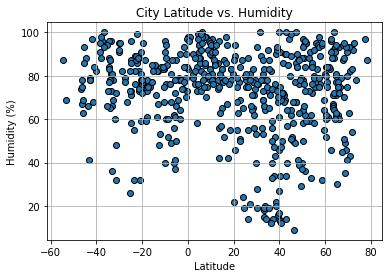

In [125]:
plt.scatter(city_weather['Latitude'], city_weather['Humidity'], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)
plt.savefig('..\output_data\scatter_lat_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

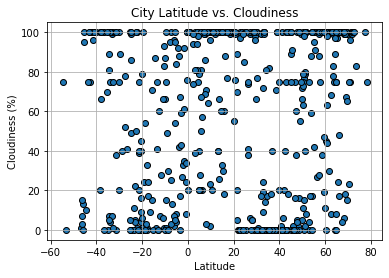

In [126]:
plt.scatter(city_weather['Latitude'], city_weather['Cloudiness'], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)
plt.savefig('..\output_data\scatter_lat_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

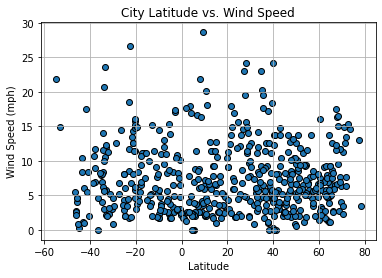

In [127]:
plt.scatter(city_weather['Latitude'], city_weather['Wind Speed'], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)
plt.savefig('..\output_data\scatter_lat_wind.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
northen_cities = city_weather[city_weather['Latitude'] >= 0]
southern_cities = city_weather[city_weather['Latitude'] < 0]

The r value is: -0.6341610951229342


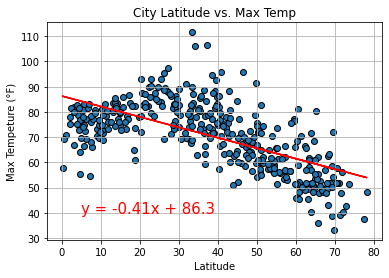

In [89]:
slope, intercept, r, p, se = linregress(northen_cities['Latitude'], northen_cities['Max Temp'])
print(f"The r value is: {r}")

plt.scatter(northen_cities['Latitude'], northen_cities['Max Temp'], edgecolors = "black")

plt.plot(northen_cities['Latitude'], intercept + (slope * northen_cities['Latitude']), color = "red")
plt.text(5, 40, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color = "red", fontsize = 15)

plt.xlabel("Latitude")
plt.ylabel("Max Tempeture (°F)")
plt.title("Northern Cities Latitude vs. Max Temp")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
r = np.corrcoef(southern_cities['Latitude'], southern_cities['Max Temp'])
m, b = np.polyfit(southern_cities['Latitude'], southern_cities['Max Temp'], 1)
print(f"The r value is: {r[0][1]}")

plt.scatter(southern_cities['Latitude'], southern_cities['Max Temp'], edgecolors = "black")

plt.plot(southern_cities['Latitude'], (m * southern_cities['Latitude']) + b, color = "red")
plt.text(-25, 30, f"y = {round(m, 2)}x + {round(b, 2)}", color = "red", fontsize = 15)

plt.xlabel("Latitude")
plt.ylabel("Max Tempeture (°F)")
plt.title("Southern Cities Latitude vs. Max Temp")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.09233612650046875


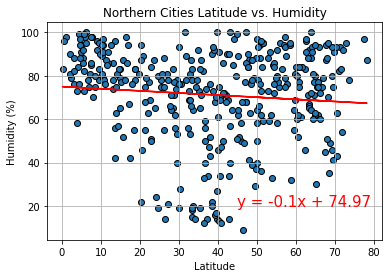

In [99]:
slope, intercept, r, p, se = linregress(northen_cities['Latitude'], northen_cities['Humidity'])
print(f"The r value is: {r}")

plt.scatter(northen_cities['Latitude'], northen_cities['Humidity'], edgecolors = "black")

plt.plot(northen_cities['Latitude'], intercept + (slope * northen_cities['Latitude']), color = "red")
plt.text(45, 20, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color = "red", fontsize = 15)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Cities Latitude vs. Humidity")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.1262525818504055


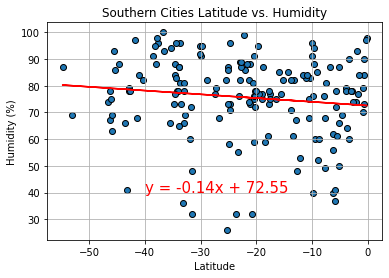

In [105]:
r = np.corrcoef(southern_cities['Latitude'], southern_cities['Humidity'])
m, b = np.polyfit(southern_cities['Latitude'], southern_cities['Humidity'], 1)
print(f"The r value is: {r[0][1]}")

plt.scatter(southern_cities['Latitude'], southern_cities['Humidity'], edgecolors = "black")

plt.plot(southern_cities['Latitude'], (m * southern_cities['Latitude']) + b, color = "red")
plt.text(-40, 40, f"y = {round(m, 2)}x + {round(b, 2)}", color = "red", fontsize = 15)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Cities Latitude vs. Humidity")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.020758265491503204


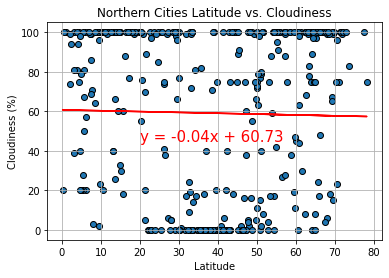

In [110]:
slope, intercept, r, p, se = linregress(northen_cities['Latitude'], northen_cities['Cloudiness'])
print(f"The r value is: {r}")

plt.scatter(northen_cities['Latitude'], northen_cities['Cloudiness'], edgecolors = "black")

plt.plot(northen_cities['Latitude'], intercept + (slope * northen_cities['Latitude']), color = "red")
plt.text(20, 45, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color = "red", fontsize = 15)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Cities Latitude vs. Cloudiness")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.15042006477149775


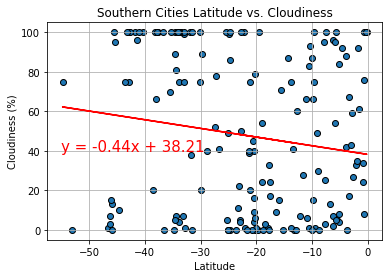

In [115]:
r = np.corrcoef(southern_cities['Latitude'], southern_cities['Cloudiness'])
m, b = np.polyfit(southern_cities['Latitude'], southern_cities['Cloudiness'], 1)
print(f"The r value is: {r[0][1]}")

plt.scatter(southern_cities['Latitude'], southern_cities['Cloudiness'], edgecolors = "black")

plt.plot(southern_cities['Latitude'], (m * southern_cities['Latitude']) + b, color = "red")
plt.text(-55, 40, f"y = {round(m, 2)}x + {round(b, 2)}", color = "red", fontsize = 15)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Cities Latitude vs. Cloudiness")
plt.grid(True)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.03101808437058793


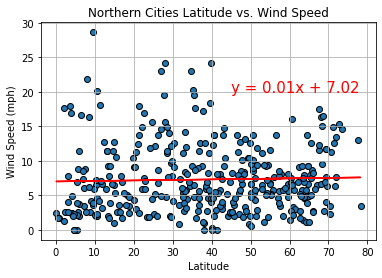

In [121]:
slope, intercept, r, p, se = linregress(northen_cities['Latitude'], northen_cities['Wind Speed'])
print(f"The r value is: {r}")

plt.scatter(northen_cities['Latitude'], northen_cities['Wind Speed'], edgecolors = "black")

plt.plot(northen_cities['Latitude'], intercept + (slope * northen_cities['Latitude']), color = "red")
plt.text(45, 20, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color = "red", fontsize = 15)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Cities Latitude vs. Wind Speed")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.03256210599908607


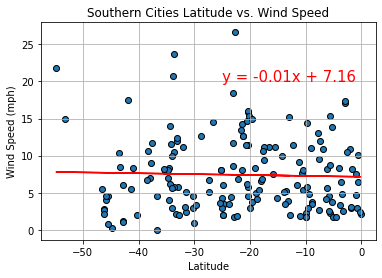

In [123]:
r = np.corrcoef(southern_cities['Latitude'], southern_cities['Wind Speed'])
m, b = np.polyfit(southern_cities['Latitude'], southern_cities['Wind Speed'], 1)
print(f"The r value is: {r[0][1]}")

plt.scatter(southern_cities['Latitude'], southern_cities['Wind Speed'], edgecolors = "black")

plt.plot(southern_cities['Latitude'], (m * southern_cities['Latitude']) + b, color = "red")
plt.text(-25, 20, f"y = {round(m, 2)}x + {round(b, 2)}", color = "red", fontsize = 15)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Cities Latitude vs. Wind Speed")
plt.grid(True)
plt.show()